**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [5]:
vec = c("CRISPRi-HCRFF", "CRISPRi-Growth", "ENCODE-rE2G Benchmark")
names(vec) = vec
VEC_TXT_ASSAY_OUT = vec

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY_INP = vec

**Check input files**

In [7]:
txt_folder = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "*.rds"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_union/data.region.merge.group_crispr.score_starrmpra.rds 


## Import data

In [17]:
txt_foldr = "fcc_astarr_macs_input_union"
txt_fdiry = file.path(FD_RES, "analysis_fcc_correlation", txt_foldr)
txt_fname = "data.region.merge.group_crispr.score_starrmpra.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

lst = readRDS(txt_fpath)

lst_dat_region_merge = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$`Top_01%`
[1] 610756      6

$`Top_02%`
[1] 610756      6

$`Top_03%`
[1] 610756      6

$`Top_04%`
[1] 610756      6

$`Top_05%`
[1] 610756      6

$`Top_06%`
[1] 610756      6

$`Top_07%`
[1] 610756      6

$`Top_08%`
[1] 610756      6

$`Top_09%`
[1] 610756      6

$`Top_10%`
[1] 610756      6

$`Top_20%`
[1] 610756      6

$`Top_30%`
[1] 610756      6

$`Top_40%`
[1] 610756      6

$`Top_50%`
[1] 610756      6



Region,CutOff_CRISPR,Assay_CRISPR,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
chr10:100009096-100010466,0.01,CRISPR,0,ASTARR,-1.2216566
chr10:100009096-100010466,0.01,CRISPR,0,ATAC,2.3214952
chr10:100009096-100010466,0.01,CRISPR,0,WSTARR,0.5896695


## Helper function

In [9]:
fun_auroc = function(vec_boo_group, vec_num_score) {
    ### sort the group by score
    idx = order(vec_num_score)
    vec = vec_boo_group[idx]
    vec_group = vec

    ### calculate total positive and negative cases
    num_total_pos = sum( vec_group)
    num_total_neg = sum(!vec_group)
    if (num_total_pos == 0 || num_total_neg == 0) {
        stop("Need at least one TRUE and one FALSE")
    }
    
    ### calculate positive and negative rates
    vec_num_tpr = (num_total_pos - cumsum( vec_group)) / num_total_pos
    vec_num_fpr = (num_total_neg - cumsum(!vec_group)) / num_total_neg

    ### convert to sensitivity and specificity
    vec_num_sens = vec_num_tpr
    vec_num_spec = 1 - vec_num_fpr
    
    ### estimate the area under curve
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### combine and return the results
    lst = list(
        "Sensitivity" = vec_num_sens,
        "Specificity" = vec_num_spec,
        "AUROC"       = num_auc
    )
    return(lst)
}

## Perform logistic regression for each assay

In [18]:
lst = lst_dat_region_merge
dat = lst[["Top_01%"]]

dat_region_merge = dat
fun_display_table(head(dat))

Region,CutOff_CRISPR,Assay_CRISPR,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
chr10:100009096-100010466,0.01,CRISPR,0,ASTARR,-1.2216566
chr10:100009096-100010466,0.01,CRISPR,0,ATAC,2.3214952
chr10:100009096-100010466,0.01,CRISPR,0,WSTARR,0.5896695
chr10:100009096-100010466,0.01,CRISPRi-Growth,0,ASTARR,-1.2216566
chr10:100009096-100010466,0.01,CRISPRi-Growth,0,ATAC,2.3214952
chr10:100009096-100010466,0.01,CRISPRi-Growth,0,WSTARR,0.5896695


In [19]:
txt_assay_out = "CRISPRi-HCRFF"
dat = dat_region_merge
dat = dat %>% dplyr::filter(Assay_CRISPR == txt_assay_out)
fun_display_table(head(dat))

Region,CutOff_CRISPR,Assay_CRISPR,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,ASTARR,-1.3401788
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,ATAC,0.6987627
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,LMPRA,-0.9157948
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,TMPRA,-0.3584732
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,WSTARR,-0.4664757
chr11:33068519-33069100,0.01,CRISPRi-HCRFF,0,ASTARR,-0.2668478


In [20]:
txt_assay_out = "CRISPRi-HCRFF"
txt_assay_inp = "ATAC"

dat = dat_region_merge
dat = dat %>% 
    dplyr::filter(
        Assay_CRISPR    == txt_assay_out, 
        Assay_STARRMPRA == txt_assay_inp
    )

print(dim(dat))
fun_display_table(head(dat))

[1] 1330    6


Region,CutOff_CRISPR,Assay_CRISPR,Group_CRISPR,Assay_STARRMPRA,Score_STARRMPRA
chr11:33065336-33066228,0.01,CRISPRi-HCRFF,0,ATAC,0.6987627
chr11:33068519-33069100,0.01,CRISPRi-HCRFF,0,ATAC,-0.1814740
chr11:33072412-33072630,0.01,CRISPRi-HCRFF,0,ATAC,-0.3956781
chr11:33103533-33104120,0.01,CRISPRi-HCRFF,0,ATAC,-0.7479004
chr11:33114629-33115134,0.01,CRISPRi-HCRFF,0,ATAC,-0.6489839
chr11:33125296-33126416,0.01,CRISPRi-HCRFF,0,ATAC,-0.6518847


In [28]:
lst = lapply(VEC_TXT_ASSAY_OUT, function(txt_assay_out){
    lst = lapply(VEC_TXT_ASSAY_INP, function(txt_assay_inp){
        ###
        dat = dat_region_merge
        dat = dat %>% 
            dplyr::filter(
                Assay_CRISPR    == txt_assay_out, 
                Assay_STARRMPRA == txt_assay_inp
            )

        ###
        fit = glm(Group_CRISPR ~ Score_STARRMPRA, data = dat, family = "binomial")
        vec_boo_group = (dat$Group_CRISPR == 1)
        vec_num_score = predict(fit, type = "response")
        
        ### calculate assay performance
        lst = fun_auroc(vec_boo_group, vec_num_score)
        vec_num_spec = lst[["Specificity"]]
        vec_num_sens = lst[["Sensitivity"]]
        num_auroc    = lst[["AUROC"]]
    
        ### summarize the results
        txt_title = paste0("(", round(num_auroc, 2), ")")
        txt_title = paste(txt_assay_inp, txt_title)
    
        dat = data.frame(
            "x" = 1 - vec_num_spec,
            "y" = vec_num_sens,
            "Assay" = txt_assay_inp,
            "AUROC" = num_auroc,
            "Performance" = txt_title
        )
        dat = dat %>% dplyr::arrange(x, y)
        return(dat)
    })
    
    ### combine results across different input assay
    dat = bind_rows(lst)
    return(dat)
})

lst_dat_logit_auroc = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$`CRISPRi-HCRFF`
[1] 5319    5

$`CRISPRi-Growth`
[1] 294769      5

$`ENCODE-rE2G Benchmark`
[1] 12400     5



x,y,Assay,AUROC,Performance
0.0000000,0.0000000,ASTARR,0.6991424,ASTARR (0.7)
0.0000000,0.0714286,ASTARR,0.6991424,ASTARR (0.7)
0.0007599,0.0714286,ASTARR,0.6991424,ASTARR (0.7)


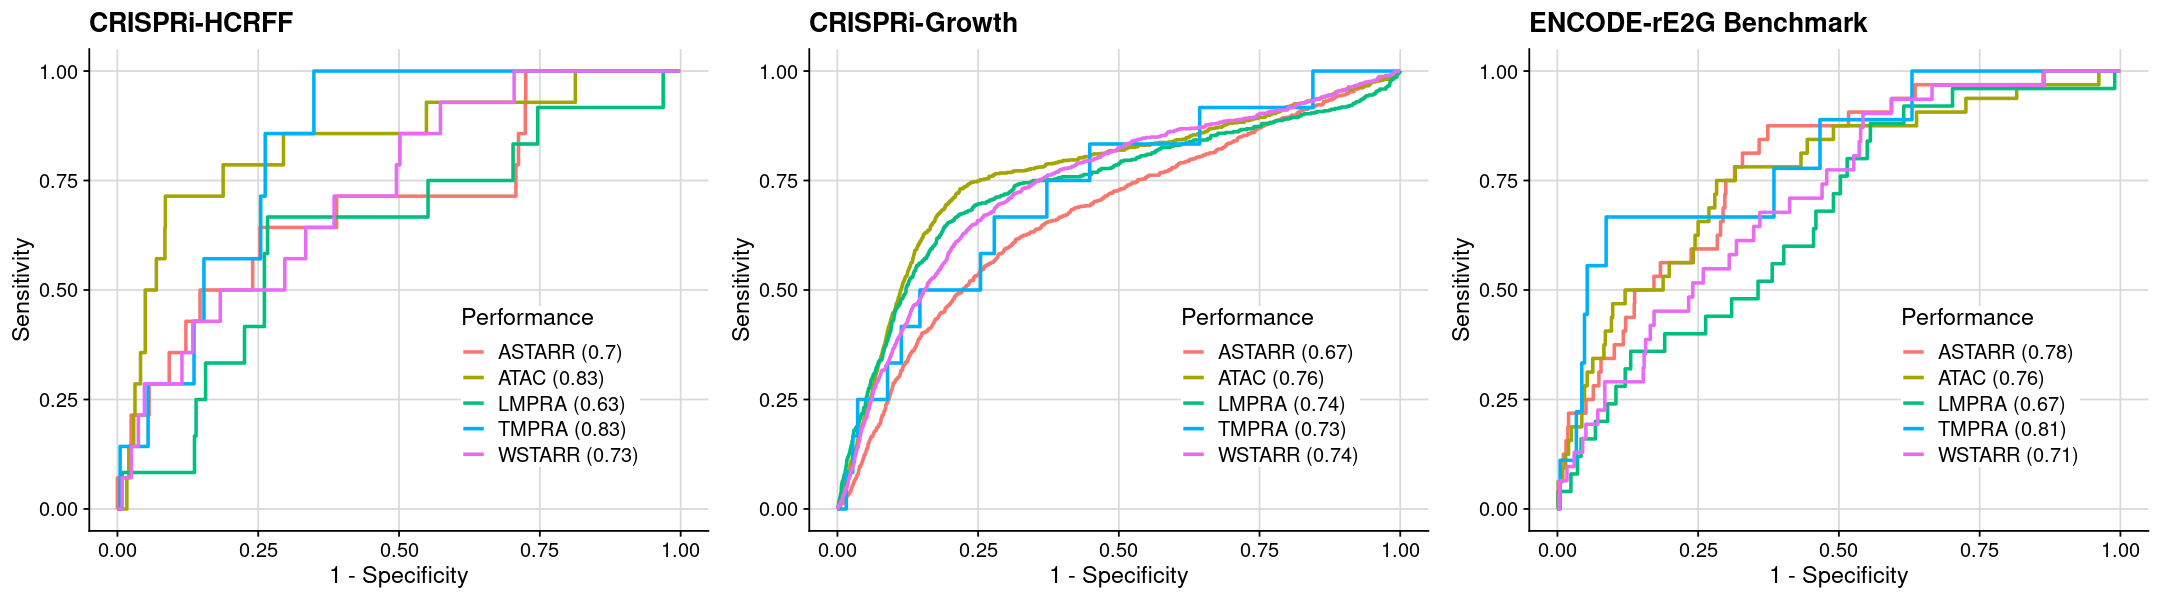

In [43]:
lst = lst_dat_logit_auroc
lst = lapply(names(lst), function(idx){
    ###
    txt = idx
    dat = lst[[idx]]

    ###
    gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
        geom_line(linewidth=1) +
        labs(x = "1 - Specificity", y = "Sensitivity", title = txt) +
        theme_cowplot() +
        background_grid() +
        theme(
            legend.background = element_rect(fill="white"),
            legend.position   = "inside",
            legend.position.inside = c(0.6, 0.3)
        )
    return(gpt)
})

lst_gpt_export_auroc_by_assay = gpt
options(repr.plot.height=5, repr.plot.width=18)
plot_grid(plotlist = lst, nrow = 1)